# Description

TODO

# Modules loading

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from clustermatch import conf

# Settings

In [ ]:
DATASET_CONFIG = conf.GTEX

In [2]:
# ENRICH_FUNCTION = "enrichGO"

In [3]:
# CORRELATION_METHOD_NAME = "clustermatch"

In [4]:
# GENE_SELECTION_STRATEGY = "var_pc_log2"

In [5]:
# # clusterProfiler settings
# ENRICH_FUNCTION = "enrichGO"
# SIMPLIFY_CUTOFF = 0.7
# GO_ONTOLOGIES = ("BP", "CC", "MF")

In [6]:
# SIMILARITY_MATRICES_DIR = DATASET_CONFIG["SIMILARITY_MATRICES_DIR"]
# display(SIMILARITY_MATRICES_DIR)

In [7]:
# SIMILARITY_MATRIX_FILENAME_TEMPLATE = DATASET_CONFIG["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
# display(SIMILARITY_MATRIX_FILENAME_TEMPLATE)

# Paths

In [8]:
INPUT_FILE = DATASET_CONFIG["GENE_ENRICHMENT_COMBINED_FILE"]
display(INPUT_FILE)
assert INPUT_FILE.exists()

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_repos/clustermatch-gene-expr/base/results/gtex_v8/gene_set_enrichment/gtex_v8_data-gene_set_enrichment.pkl')

# Load data

In [9]:
df = pd.read_pickle(INPUT_FILE)

In [10]:
df.shape

(2754014, 21)

In [11]:
df.columns

Index(['n_clusters', 'cluster_id', 'go_term_id', 'go_term_desc', 'gene_count',
       'gene_total', 'gene_ratio', 'bg_count', 'bg_total', 'bg_ratio',
       'pvalue', 'fdr_per_file', 'tissue', 'gene_sel_strategy', 'corr_method',
       'clust_method', 'enrich_func', 'results_subset', 'rich_factor',
       'fold_enrich', 'fdr'],
      dtype='object')

In [12]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    tmp = df.head()
    display(tmp)

,n_clusters,cluster_id,go_term_id,go_term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,pvalue,fdr_per_file,tissue,gene_sel_strategy,corr_method,clust_method,enrich_func,results_subset,rich_factor,fold_enrich,fdr
0,2,C0,GO:0002443,leukocyte mediated immunity,182,523,0.347992,357,3528,0.101190,1.930523e-67,5.513573e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.509804,3.438983,5.663883e-65
1,2,C0,GO:0002250,adaptive immune response,153,523,0.292543,260,3528,0.073696,3.935201e-67,5.619467e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.588462,3.969584,1.135303e-64
2,2,C0,GO:0002252,immune effector process,210,523,0.401530,478,3528,0.135488,1.994762e-64,1.899014e-61,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.439331,2.963591,5.158798e-62
3,2,C0,GO:0050776,regulation of immune response,178,523,0.340344,372,3528,0.105442,3.908673e-60,2.790792e-57,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.478495,3.227780,8.008734e-58
4,2,C0,GO:0006909,phagocytosis,112,523,0.214149,171,3528,0.048469,5.285733e-55,3.019211e-52,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.654971,4.418235,8.263032e-53


# QQ plot

In [13]:
# CLUSTERMATCH_METHOD = "clustermatch_k2"
CLUSTERMATCH_METHOD = "clustermatch"

In [14]:
# PERFORMANCE_MEASURE = "fdr"
# PERFORMANCE_MEASURE = "rich_factor"
PERFORMANCE_MEASURE = "fold_enrich"

In [15]:
QUANTILES = np.linspace(0, 1, 10000)
display(QUANTILES[:10])
display(QUANTILES[-10:])

array([0.        , 0.00010001, 0.00020002, 0.00030003, 0.00040004,
       0.00050005, 0.00060006, 0.00070007, 0.00080008, 0.00090009])

array([0.99909991, 0.99919992, 0.99929993, 0.99939994, 0.99949995,
       0.99959996, 0.99969997, 0.99979998, 0.99989999, 1.        ])

In [16]:
df["results_subset"].unique()

['BP_full', 'BP_simplified_070', 'CC_full', 'CC_simplified_070', 'MF_full', 'MF_simplified_070']
Categories (6, object): ['BP_full', 'BP_simplified_070', 'CC_full', 'CC_simplified_070', 'MF_full', 'MF_simplified_070']

In [17]:
df_subset = df[
    (np.ones(df.shape[0]).astype(bool))
    & (df.fdr < 0.05)  # only significant results
    #     & (df.tissue == "adipose_subcutaneous")
    & (df.gene_sel_strategy == "var_pc_log2")
    & (df.clust_method == "SpectralClustering")
    & (df.enrich_func == "enrichGO")
    & (df.results_subset.str.contains("_full"))
]

In [18]:
assert df_subset["fdr"].max() < 0.05

In [19]:
df_subset.shape

(1897767, 21)

In [20]:
df_subset.head()

,n_clusters,cluster_id,go_term_id,go_term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,...,fdr_per_file,tissue,gene_sel_strategy,corr_method,clust_method,enrich_func,results_subset,rich_factor,fold_enrich,fdr
0,2,C0,GO:0002443,leukocyte mediated immunity,182,523,0.347992,357,3528,0.101190,...,5.513573e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.509804,3.438983,5.663883e-65
1,2,C0,GO:0002250,adaptive immune response,153,523,0.292543,260,3528,0.073696,...,5.619467e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.588462,3.969584,1.135303e-64
2,2,C0,GO:0002252,immune effector process,210,523,0.401530,478,3528,0.135488,...,1.899014e-61,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.439331,2.963591,5.158798e-62
3,2,C0,GO:0050776,regulation of immune response,178,523,0.340344,372,3528,0.105442,...,2.790792e-57,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.478495,3.227780,8.008734e-58
4,2,C0,GO:0006909,phagocytosis,112,523,0.214149,171,3528,0.048469,...,3.019211e-52,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.654971,4.418235,8.263032e-53


In [21]:
df_methods = df_subset["corr_method"].unique()
display(df_methods)

['clustermatch', 'clustermatch_k2', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']
Categories (6, object): ['clustermatch', 'clustermatch_k2', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']

In [22]:
results_per_method = {}

for m in df_methods:
    df_values = df_subset[df_subset.corr_method == m][PERFORMANCE_MEASURE]
    display(f"{m} - {df_values.shape[0]}")

    if PERFORMANCE_MEASURE == "fdr":
        df_values = -np.log10(df_values)

    results_per_method[m] = df_values.quantile(QUANTILES).to_numpy()

'clustermatch - 296615'

'clustermatch_k2 - 258196'

'pearson_abs - 339869'

'pearson_full - 353178'

'spearman_abs - 281691'

'spearman_full - 368218'

In [23]:
quantiles_df = pd.DataFrame(results_per_method)

In [24]:
quantiles_df.shape

(10000, 6)

In [25]:
quantiles_df.head()

,clustermatch,clustermatch_k2,pearson_abs,pearson_full,spearman_abs,spearman_full
0,1.019003,1.017350,1.023499,1.090801,1.059430,1.097377
1,1.023292,1.037622,1.028234,1.124093,1.085439,1.124978
2,1.024089,1.041308,1.029964,1.141046,1.099836,1.140407
3,1.026205,1.043804,1.033060,1.156749,1.110228,1.154147
4,1.026205,1.044957,1.033364,1.171394,1.119706,1.164342


In [26]:
quantiles_df.tail()

,clustermatch,clustermatch_k2,pearson_abs,pearson_full,spearman_abs,spearman_full
9995,401.3,401.3,387.8,357.727273,401.3,376.727273
9996,401.3,401.3,401.3,364.818182,401.3,393.500000
9997,401.3,401.3,401.3,375.360576,401.3,401.300000
9998,401.3,401.3,401.3,401.300000,401.3,401.300000
9999,414.4,414.4,414.4,414.400000,414.4,414.400000


In [27]:
quantiles_df.describe()

,clustermatch,clustermatch_k2,pearson_abs,pearson_full,spearman_abs,spearman_full
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.069571,33.216362,22.144066,16.800855,25.473964,19.336986
std,44.458997,57.177409,39.086960,29.564972,48.949089,38.041933
min,1.019003,1.017350,1.023499,1.090801,1.059430,1.097377
25%,3.616996,3.559373,3.924059,4.203943,3.517078,3.956541
50%,7.981841,9.911426,8.832781,8.035278,7.454494,7.500925
75%,22.621609,35.280000,22.585519,17.103320,22.244221,16.871066
max,414.400000,414.400000,414.400000,414.400000,414.400000,414.400000


Text(0.5, 1.0, 'Gene Ontology (fold_enrich)')

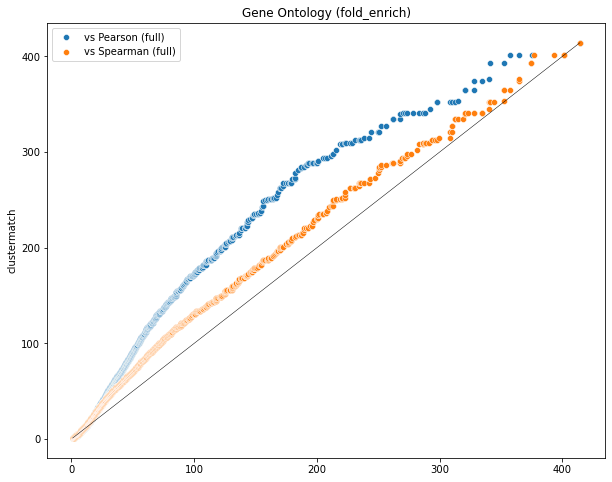

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson_full",
    y=CLUSTERMATCH_METHOD,
    label="vs Pearson (full)",
    ax=ax,
)

sns.scatterplot(
    data=quantiles_df,
    x="spearman_full",
    y=CLUSTERMATCH_METHOD,
    label="vs Spearman (full)",
    ax=ax,
)

ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

Text(0.5, 1.0, 'Gene Ontology (fold_enrich)')

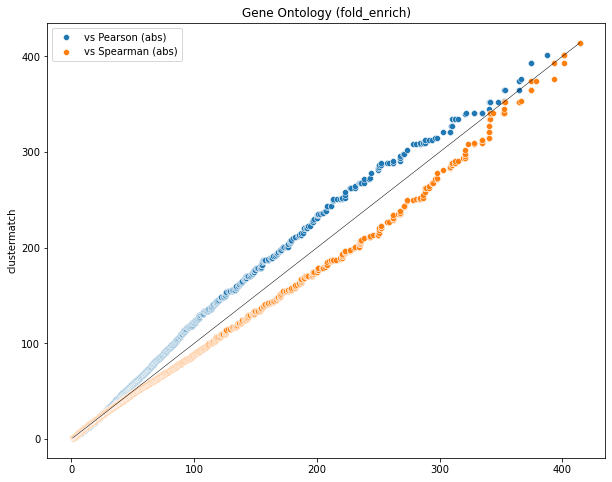

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson_abs",
    y=CLUSTERMATCH_METHOD,
    label="vs Pearson (abs)",
    ax=ax,
)

sns.scatterplot(
    data=quantiles_df,
    x="spearman_abs",
    y=CLUSTERMATCH_METHOD,
    label="vs Spearman (abs)",
    ax=ax,
)

ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

**UPDATE**

Clustermatch (multi pattern) outperforms pearson (linear and abs), although pearson find most significant associations towards the
right end of the distribution.

However, Clustermatch does not outperform spearman (monotonic and abs), which provides more significant results across the entire distribution.